In [1]:
import pandas as pd
import heartpy as hp
from sklearn import preprocessing
from scipy import signal, interpolate
import numpy as np



In [2]:
# Create pickle EKG file from delsys CSV files

filePath = '/Users/HAQbook/Desktop/graaaaphs/data/'

df2 = pd.DataFrame() # empty df
for n in range(1,7): # over all six trials, 
    f = filePath+'EKG/Trial_'+str(n)+'.csv' #get delsys file
    df = pd.read_csv(f,skiprows=5) # skip the useless rows
    df2['Piece'+str(n)] = df['EKG 1 (mV)'] # add only the EKG column for each piece to df2
print(df2.head())
#df2 = df2.tail(-1) #remove the first row which is the sample rate (sr). In this case, sr = 1259.2593 
#pd.to_pickle(df2,filePath+'EKG.pkl') # export to pickle


/var/folders/x8/dffsj_396p13k04rwz8l2wbh0000gn/T/ipykernel_18477/3343222449.py:8: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f,skiprows=5) # skip the useless rows
/var/folders/x8/dffsj_396p13k04rwz8l2wbh0000gn/T/ipykernel_18477/3343222449.py:8: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f,skiprows=5) # skip the useless rows
/var/folders/x8/dffsj_396p13k04rwz8l2wbh0000gn/T/ipykernel_18477/3343222449.py:8: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f,skiprows=5) # skip the useless rows
/var/folders/x8/dffsj_396p13k04rwz8l2wbh0000gn/T/ipykernel_18477/3343222449.py:8: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f,skiprows=5) # skip the useless rows
/var/folders/x8/dffsj_396p13k04rwz8l

         Piece1        Piece2        Piece3        Piece4        Piece5  \
0  1259.2593 Hz  1259.2593 Hz  1259.2593 Hz  1259.2593 Hz  1259.2593 Hz   
1    -0.0077211     0.0439765     0.0929885    -0.0231632    -0.0379339   
2    -0.0077211     0.0426337     0.0923171    -0.0208133    -0.0386053   
3    -0.0070497     0.0409552     0.0933242     -0.017792    -0.0406195   
4    -0.0083925     0.0396124     0.0936599    -0.0151064    -0.0412909   

         Piece6  
0  1259.2593 Hz  
1     0.0083925  
2     0.0090639  
3     0.0090639  
4     0.0090639  


/var/folders/x8/dffsj_396p13k04rwz8l2wbh0000gn/T/ipykernel_18477/3343222449.py:8: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f,skiprows=5) # skip the useless rows


In [20]:
# test plot the data
'''
from matplotlib import pyplot as plt
%matplotlib widget
def pltplot(pieceNum):
    ekg = ekg_data['Piece'+str(pieceNum)].astype(float).to_numpy()
    plt.plot(ekg)
pltplot(2)
'''

"\nfrom matplotlib import pyplot as plt\n%matplotlib widget\ndef pltplot(pieceNum):\n    ekg = ekg_data['Piece'+str(pieceNum)].astype(float).to_numpy()\n    plt.plot(ekg)\npltplot(2)\n"

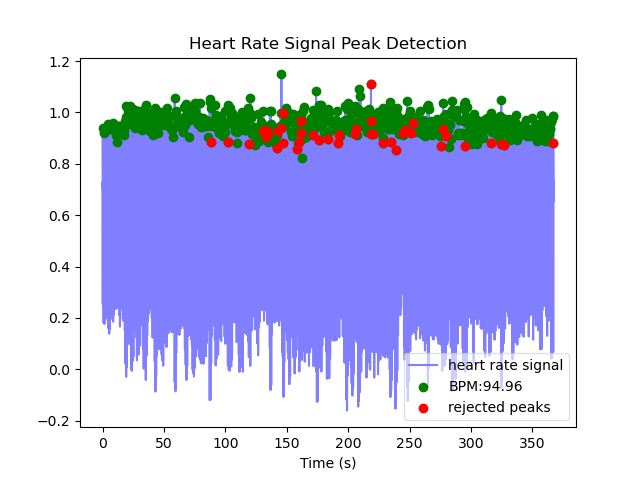

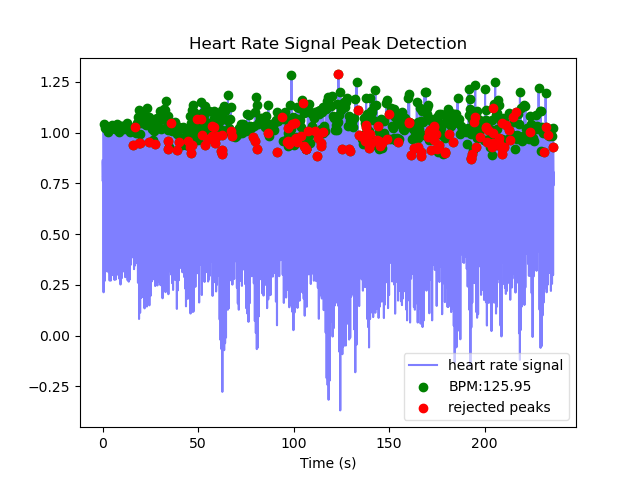

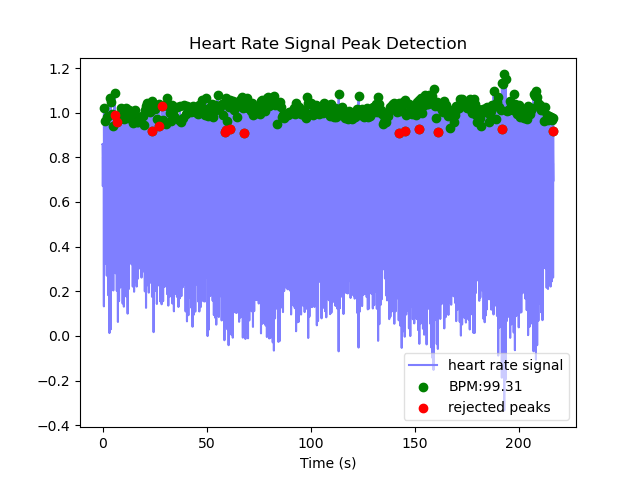

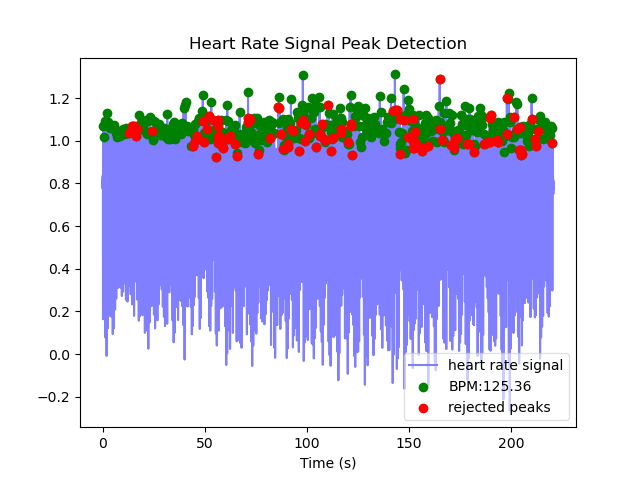

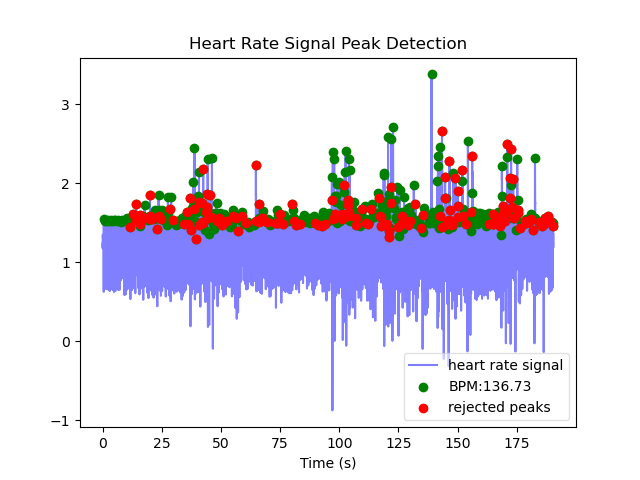

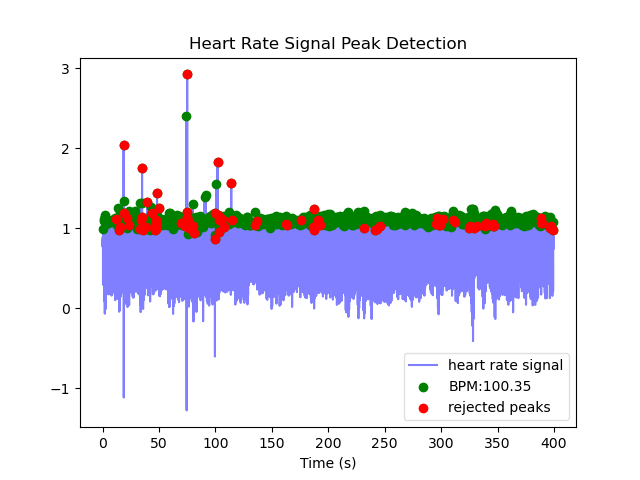

'Interesting: For pieces..\n1: 95 bpm, clean peak detection\n2: 126 bpm\n3: 99.3 bpm, cleanest peak detection\n4: 125.4 bpm\n5: 136.7 bpm, messiest peak detection \n6: 100.4 bpm\n'

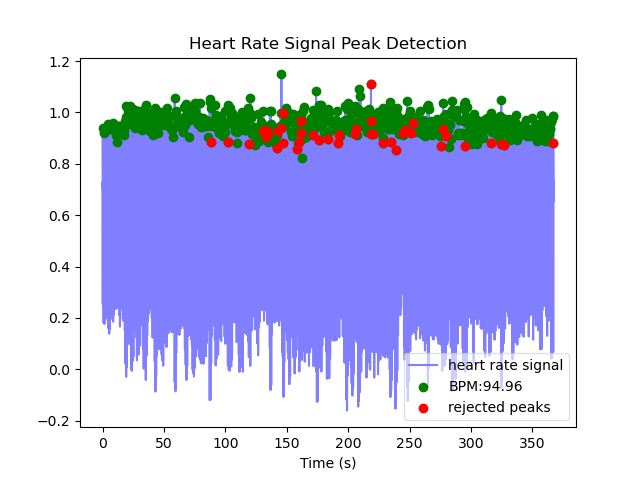

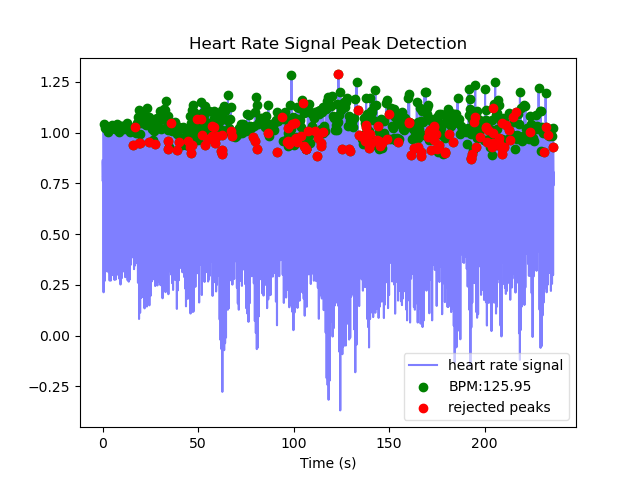

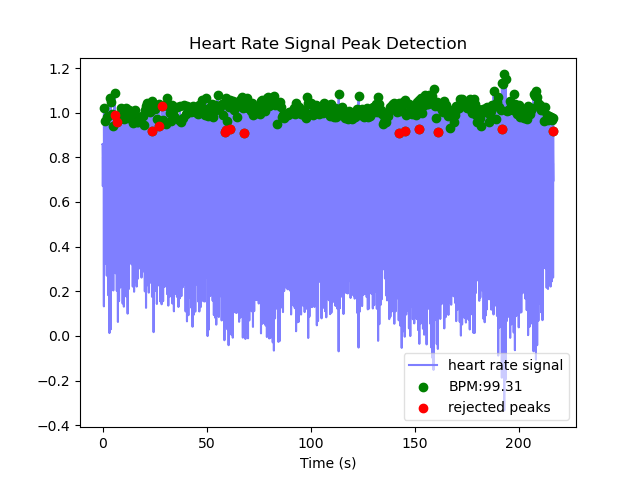

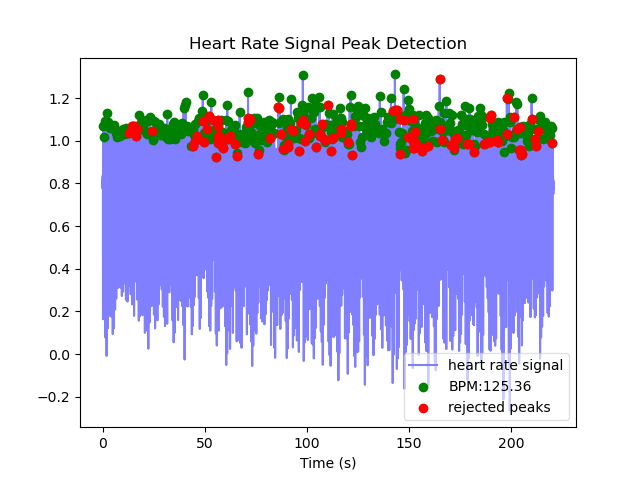

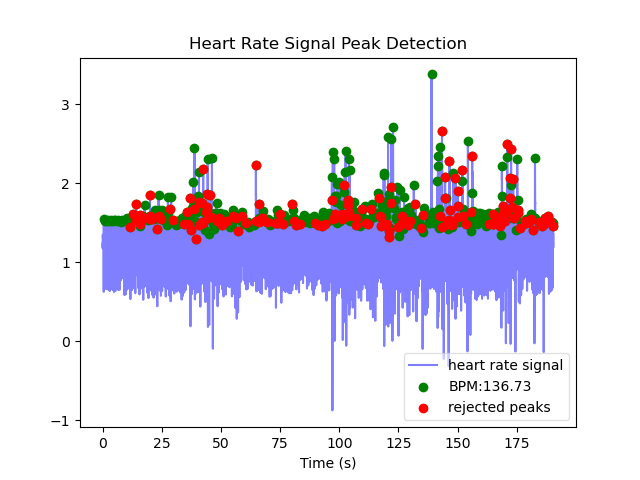

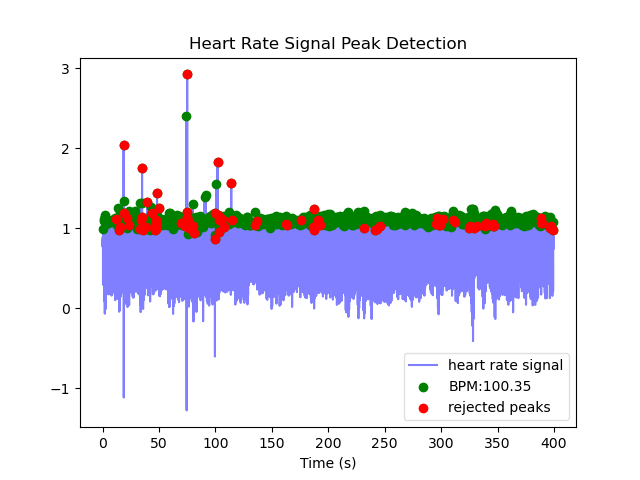

In [21]:
ekg_data = pd.read_pickle(filePath+'EKG.pkl')
sr = 1259.2593 

# helpful function to get the ekg data for the period we want.
def ekg(pieceNum, SEGMENT='full'): #ekg(df.iloc[i]) # piece number
    ekg = ekg_data['Piece'+str(pieceNum)].astype(float).to_numpy()
    ekg = ekg[~np.isnan(ekg)] # remove the nan values at the end
    if SEGMENT=='full':
        wd, m = hp.process(ekg, sample_rate = sr) #
    else:
        wd, m = hp.process_segmentwise(ekg, sample_rate=sr, replace_outliers = True, segment_width = SEGMENT, segment_overlap = 0.25)
    return(wd,m)
        
        
    #it = abs(int(ekg.t[0]*sr)) # time==0 at t[it]
    #data = np.squeeze(ekg())[it:] # get data from time t = 0 to end, and make into numpy array
    #st = int(row['start_t']) # from start of guitar playing time stamp,


    
for i in range(1,7):
    working_data, measures = ekg(i)
    #print(measures['bpm'])
    hp.plotter(working_data, measures)

'''Interesting: For pieces..
1: 95 bpm, clean peak detection
2: 126 bpm
3: 99.3 bpm, cleanest peak detection
4: 125.4 bpm
5: 136.7 bpm, messiest peak detection 
6: 100.4 bpm
'''


1259.2593


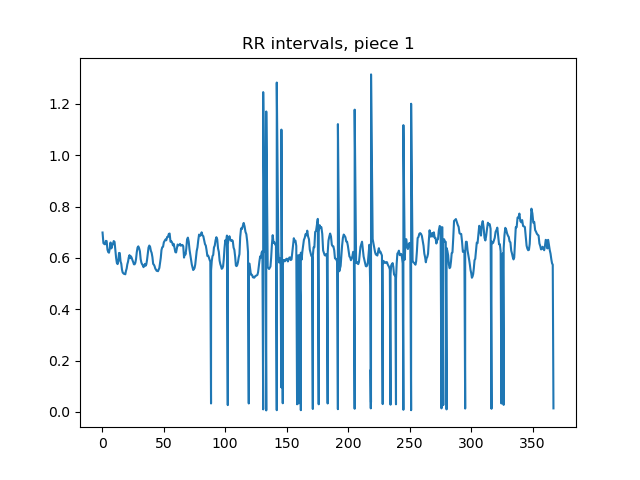

1259.2593


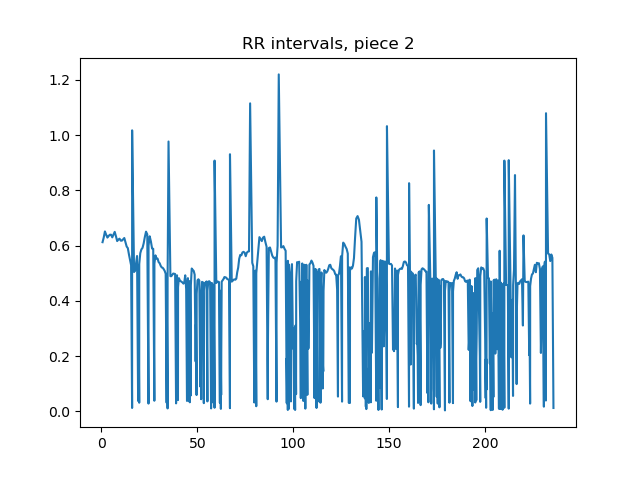

1259.2593


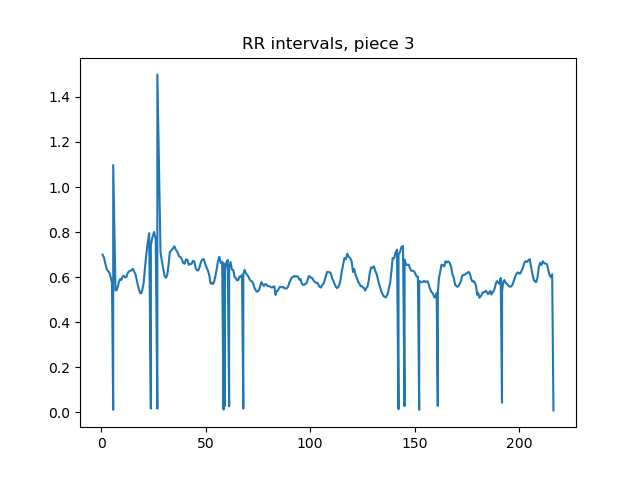

1259.2593


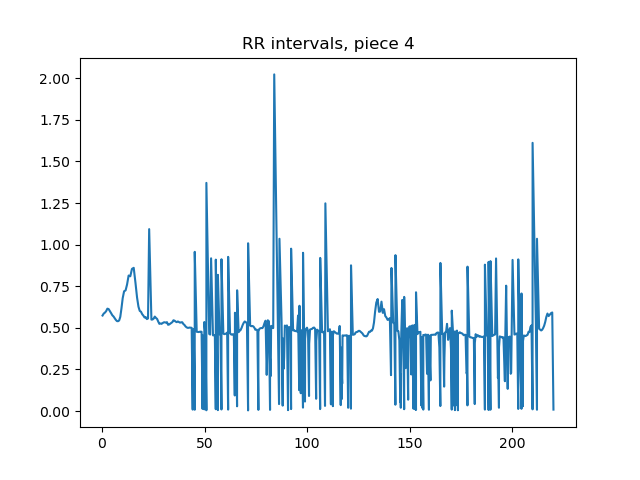

1259.2593


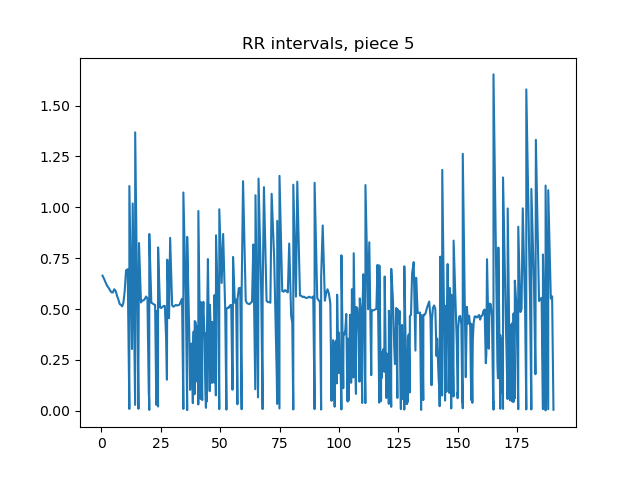

1259.2593


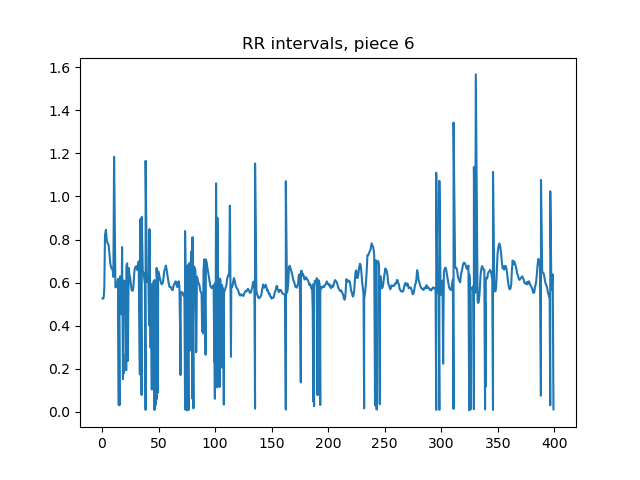

In [12]:
# now let's plot rr ints for resonance


for i in range(1,7): #num of pieces
    # get data
    working_data, measures = ekg(i)

    # plot signal and plot RR intervals
    peaksX, fs = working_data['peaklist'], working_data['sample_rate'] 
    rr_ints = np.diff(peaksX)/fs
    fig = plt.figure()
    plt.plot(np.array(peaksX[:-1])/fs,rr_ints);
    plt.title("RR intervals, piece "+str(i))
    plt.show()
    